# Линейная регрессия
Самый простой вариант с одним признаком: 
- по **горионтали** - признак (х)
- по **вертикали** - вещественная целевая переменная (у)
  
**Точки** - объекты, которые пытаемся предсказать. **Прямая** - линейная регрессия, которая описывается функцией y = a + bx. В многомерном пространстве дальше будет умножение признаков на некоторые коэффициенты.

- коэффициент перед х - наклон прямой
- свободный член - сдвиг по у (баейс)
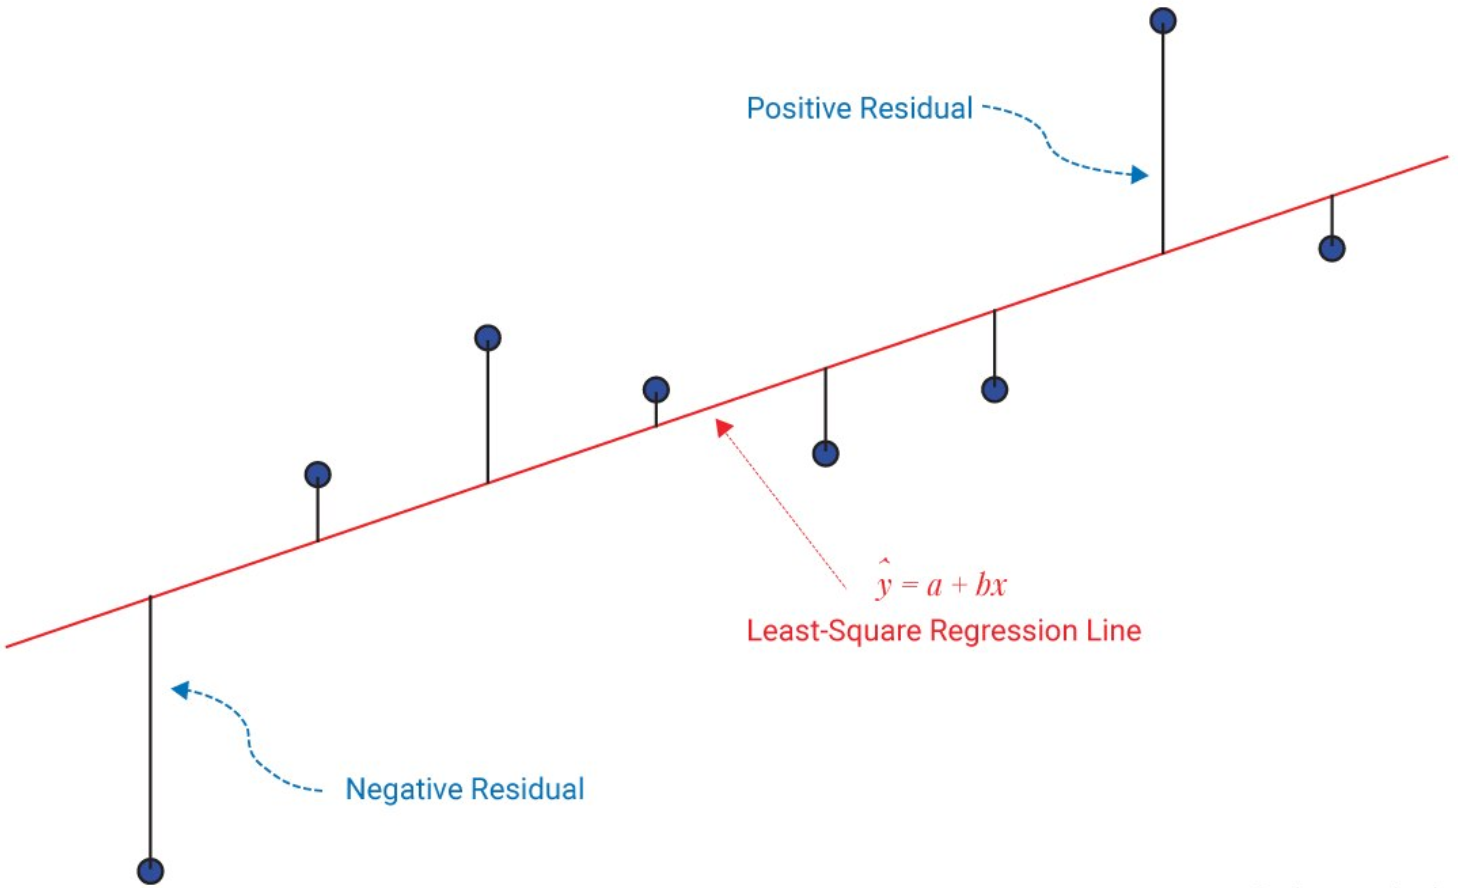

# Метод наименьших квадратов
Точное математическое вычисление коэффициентов a и b. В общем виде МНК позволяет получить математически точную регрессию.  

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

**Датасет** - данные роста и веса людей. Хотим, зная рост человека, предсказать его вес.

In [91]:
data = pd.read_csv('/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Documents/HSE/1 семестр/Анализ данных и машинное обучение/Data/dataset.csv')

Делим выборку на обучающую и тестовую.

In [92]:
train, test = train_test_split(data, test_size=0.1)
train.shape, test.shape

((90, 2), (10, 2))

In [93]:
data.head()

,height,weight
0,186.63,90.97
1,169.75,62.76
2,168.66,56.16
3,173.03,64.37
4,172.21,64.71


Видим, что есть зависимость веса от роста человека. 

In [94]:
import seaborn as sns

<Axes: xlabel='height', ylabel='weight'>

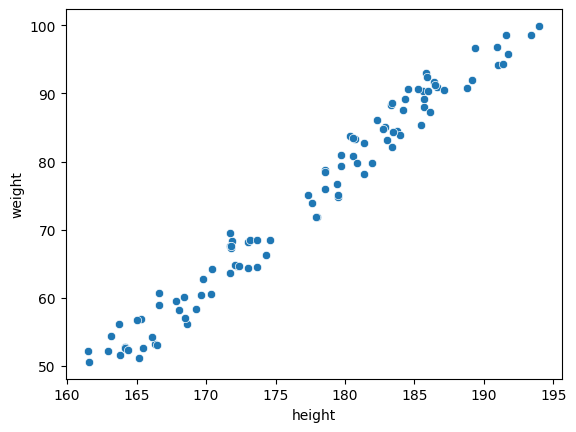

In [95]:
sns.scatterplot(data, x = 'height', y = 'weight')

## Обучение
МНК в разложенном виде (формулой). Из х и у вычисляем коэффициенты а и b. 

In [96]:
x = train.height
y = train.weight

b_ch = (len(train) * (x * y).sum()) - (x.sum() * y.sum())
b_zn = len(train) * (x**2).sum() - x.sum() ** 2
b = b_ch / b_zn
b

np.float64(1.64643617567723)

In [97]:
a = (y.sum() * ((x**2).sum()) - (x.sum() * (x * y).sum())) / b_zn
a

np.float64(-217.3259411417079)

Можно взять линейную регрессию из **sklearn** (решает с помощью МНК) и обучить ее на x и y.
- **coef_** - коэффициент b
- **intercept_** - свободный член а

In [98]:
model = LinearRegression().fit(np.array(x)[:, None], y)
model.coef_, model.intercept_

(array([1.64643618]), np.float64(-217.32594114171366))

<Axes: xlabel='height', ylabel='weight'>

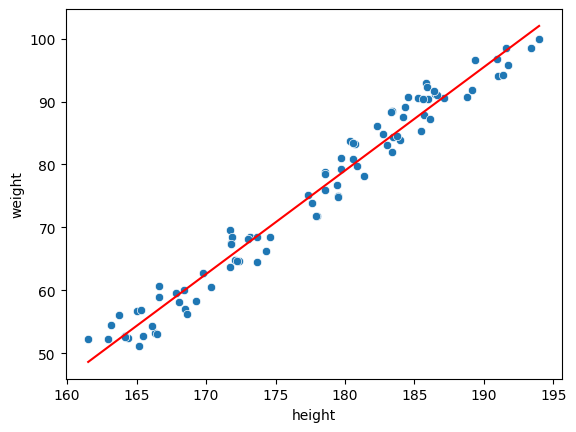

In [99]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=b * x + a, color="red")

## Тест

In [100]:
import matplotlib.pyplot as plt

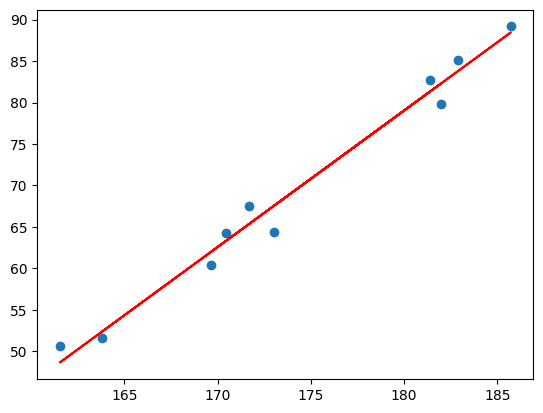

In [101]:
plt.scatter(test.height, test.weight)
plt.plot(test.height, b * test.height + a, color="red")

# Линейная регрессия через градиентный спуск

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Предобработка данных

Датасет по автомобилям: признаки и цена (целевая переменная).

In [103]:
data = pd.read_csv('/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Documents/HSE/1 семестр/Анализ данных и машинное обучение/Data/automobile/imports-85.data', header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


В датасете 205 машин (объектов) и 25 признаков (целочисленные, вещественные, категориальные). Есть незаполненные данные (164 non-null).

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

В случае **категориальных** данных (строковый тип) базовый вариант сказать, что случаи, когда не указана категория объекта - отдельная категория. По сути заполняем пустыми строками, но можно и значениями, которых еще нет в датасете.

Фильтруем значения по типу данных. Смотрим маску по категориальным признакам и передаем в loc. Вещественный тип данных заполняем по среднему.

In [105]:
data.dtypes == "object"

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [106]:
data.loc[:, data.dtypes == "float64"] = data.loc[:, data.dtypes == "float64"].fillna(
    data.loc[:, data.dtypes == "float64"].mean(axis=0)
)
data.loc[:, data.dtypes == "object"] = data.loc[:, data.dtypes == "object"].fillna("")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Проверяем, что в выборке нет нулевых значений.

In [107]:
data.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [108]:
data.loc[:, data.dtypes == "object"].shape

(205, 10)

In [109]:
data.loc[:, data.dtypes == "float64"].shape

(205, 11)

### Кодирование признаков
Считать коэффициенты можно только для численных признаков, поэтому категориальные признаки надо **закодировать**. 

Способ как это можно сделать - **One Hot Encoding**. Вместо одного столбца с категориальными признаками добавляем такое же количество признаков, каждый из которых будет бинарным и будет говорить, принадлежит ли текущей объект определенной марке. Для каждой категории из этого признака появляется новый столбец, в котором значения Trye/False обозначают принадлежность объекта к этому признаку.

Функция get_dummies автоматически пропускает вещественные признаки. 

В sklearn тоже есть функция OneHotEncoding и **LabelEncoder** - не добавляет новые колонки, а делает один численный столбец: существующие категории преобразует в числа от 0 до n-1 длины категории.

In [110]:
data[2].unique()
pd.get_dummies(data[2])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [111]:
data_encoded = pd.get_dummies(data)
data_encoded

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


Берем все как х, кроме 25-го признака - целевая переменная.

In [112]:
data_encoded.columns = data_encoded.columns.astype(str)
X = data_encoded.drop(columns=["25"])
y = data_encoded["25"]

Делим на тестовую и обучающую выборки. За счет кодирования категориальных переменных количество признаков увеличилось с 25 до 76.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [114]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((184, 76), (184,), (21, 76), (21,))

**RobustScaler**, в отличие StandartScaler, скейлит относительно не среднего и стандартного отклонения, а медианы и квартилей. Robust достаточно устойчив относительно выбросов, так как среднее и отклолнение плохо себя ведет при наличии больших выбросов. 

Scaler по сути является частью алгоритма машинного обучения, поэтому он не должен ничего знать о тестовых данных (на которых мы проверяем). Поэтому обучаем Scaler только на train и скейлим test относительно распредления train. 

In [115]:
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

По метрике **R2** регрессор получился хороший. **MSE** тяжело интерпретировать, он скорее подходит для сравнения двух разных моделей. **MAE** можно интерпретировать, так как это по сути среднее отклонениние. 

По метрике MAE видно, что в среднем мы ошибаемся на 1600 долларов, что достаточно много относительно средней цены 12,5 тысяч. 

In [204]:
model = LinearRegression().fit(X_train, y_train)
preds = model.predict(X_test)
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    R2_test = {metrics.r2_score(y_test, preds)}
""")


    MSE_test = 4532429.049374129,
    MAE_test = 1604.1453640139032
    R2_test = 0.9428782016234766



In [117]:
y_test.mean()

np.float64(12494.761904761905)

# Градиентный спуск
Так как sklearn работает с МНК, который математически точно подбирает решение, он не всегда хорошо работает на больших данных. 

Поэтому используют **градиентный спуск** - регрессор подает какой-то результат, считаем эту ошибку по некоторой метрике. Считаем значение функции потерь (ошибки). Для функции потерь **LOS** используют некоторые другие функции, но MSE тоже работает. 

Чтобы работать лучше, надо уменьшить ошибку. Можем посчитать градиент по функции потерь и сделать шаг в сторону уменьшения ошибки. Делая такие шаги в сторону антиградиента, мы рано или поздно можем сойти к минимуму (но не всегда глобальному). 

Функция MSE квадратичная, хорошо оптимизируется и легко дифференциируется. Градиент считается через обычное дифференциирование функции. **y_pred** - это x, умноженные на коэффициенты. 

По правилам дифференциирования сложных функций берем производные внешней и внутренней функций. Квадрат разности в формуле MSE можно перевернуть, чтобы избавиться от (-х) в производной. 

In [ ]:
# MSE
(y - y_pred) ** 2 = (y - x @ w) ** 2 = (x @ w - y) ** 2
2 * (x @ w - y) * x # производная MSE для весов 
2 * (x_pred - y) = 2 * (x @ w - y) # производная MSE для байесов

В numpy можно умножить построчно матрицу на вектор. Разница y - y_pred имеет размерность 184 (одно число для каждого объекта), умножаем это на транспонированную матрицу x, чтобы объекты стали средами, а столбцы - признаками, и делим размер выборки. 

In [169]:
X_train.shape, X_test.shape

((184, 76), (21, 76))

In [170]:
(X_train @ w).shape, y_train.shape

((184,), (184,))

In [171]:
w = np.random.randn(X_train.shape[1])

((2 * X_train.T @ (X_train @ w - y_train)) / X_train.shape[0]).shape, w.shape

((76,), (76,))

**lr** - гипперпараметр, подбираем его под конкретную задачу в зависимости от данных и других гипперпараметров. Рекомендуется делать маленький шаги, чтобы не перескочить минимум (оптимум) функции, и соответственно, никогда в него не попасть.  

При достижении максимального значения функции ошибки или величины шага, алгоритм останавливается. Это позволяет не ходить бессмысленно, если были неправильно заданы параметры. 

В отличие от KNN основное действие в градиентном спуске происходит в **fit**. Необходимо обучить коэффициенты линейной функции и сдвиг (байес). Инициализировать веса не обязательно из random, можно инициализировать их 0 (это не так важно для данной задачи). 

In [186]:
class LinReg:
    def __init__(self, lr: float = 1e-3, num_steps: int = 10000): # learning rate - шаг, который делаем в сторону градиента, алгоритм итеративный - устанавливаем количество шагов 
        self.lr = lr
        self.num_steps = num_steps # способ ранней остановки 
        self.w = np.random.rand(1) # инициализируем многомерные веса, зависящие от размерности данных 
        self.b = 0 # инициализируем байес 

    def grad_w(self, y: np.ndarray, y_pred: np.ndarray, x:np.ndarray) -> np.ndarray: # передаем y_pred, которые заранее посчитали, для градиента по w нужны x, вектор будет такого же размера, как веса 
        return (2 * x.T @ (y_pred - y)) / x.shape[0] # функция ошибки MSE (y - вектор, длиной равной кол-ву объектов, x - объекты с кол-вом признаков)
    
    def grad_b(self, y: np.ndarray, y_pred: np.ndarray) -> float: # не нужны x и получаем не вектор, а float 
        return (2 * (y_pred - y)).mean() # нет x и берем среднее для удобства
        
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.w = np.random.randn(X_train.shape[1])# иницииализируем веса уже с правильной размерностью (равна кол-ву признаков) 
        self.b = 0
        for _ in range(self.num_steps): # делаем шаги по кол-ву итераций 
            y_pred = self.predict(X_train) # считаем, как мы ошибаемся, на обучающих данных 
            self.w -= self.lr * self.grad_w(y_train, y_pred, X_train) # меняем веса и байес относительно того, как мы ошибаемся - вычисляем градиен, умножаем на шаг и вычитаем из весов 
            self.b -= self.lr * self.grad_b(y_train, y_pred)

    def predict(self, X_test: np.ndarray) -> np.ndarray: # test возвращает вещественные значения цены
        return X_test @ self.w + self.b # матрично умножаем х на веса и прибавляем сдвиг(y = ax + b)

In [187]:
my_model = LinReg()
my_model.fit(X_train, y_train)
preds = my_model.predict(X_test)

За счет итеративности и шагов градиентный спуск хуже свободится к train и может лучше обощать данные.

In [205]:
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    R2_test = {metrics.r2_score(y_test, preds)}
""")


    MSE_test = 4532429.049374129,
    MAE_test = 1604.1453640139032
    R2_test = 0.9428782016234766



Посчитав функцию потерь по нашей модели и sclearn, видим, что наша модель хуже сошлась, но за счет других метрик на тестовых данных качество немного лучше. Это не всегда будет так в зависимости от разделения выборок и данных.  

In [190]:
metrics.mean_squared_error(y_train, model.predict(X_train))

np.float64(2377897.4542322666)

In [191]:
metrics.mean_squared_error(y_train, my_model.predict(X_train))

np.float64(6029290.041219489)

Можно добавить нахождение функции потерь в саму модель.

In [181]:
class MyLinearRegression:
    def __init__(self, lr=0.001, num_iter=10000) -> None:
        self.lr = lr
        self.num_iter = num_iter

    def calculate_loss(self, y, y_pred):
        return ((y - y_pred) ** 2).mean()

    def calculate_dldw(self, y, y_pred, x):
        grad_w = (-2 * (x.T * (y - y_pred)).T).mean(axis=0)
        return grad_w

    def calculate_dldb(self, y, y_pred):
        grad_b = (-2 * (y - y_pred)).mean()
        return grad_b

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        self.weights = np.random.rand(X_train.shape[1])
        self.b = 0
        for i in range(self.num_iter):
            pred = (X_train @ self.weights) + self.b
            self.weights -= self.lr * self.calculate_dldw(y_train, pred, X_train)
            self.b -= self.lr * self.calculate_dldb(y_train, pred)

    def predict(self, X_test):
        return X_test @ self.weights + self.b

In [193]:
my_model_1 = MyLinearRegression()
my_model_1.fit(X_train, y_train)
preds = my_model_1.predict(X_test)


In [206]:
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    R2_test = {metrics.r2_score(y_test, preds)}
""")


    MSE_test = 4532429.049374129,
    MAE_test = 1604.1453640139032
    R2_test = 0.9428782016234766



Если сократить количество шагов до 100, мы никуда не дойдем, так как маленький R2.

In [199]:
my_model = LinReg(num_steps = 100)
my_model.fit(X_train, y_train)
preds = my_model.predict(X_test)

In [207]:
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    R2_test = {metrics.r2_score(y_test, preds)}
""")


    MSE_test = 4532429.049374129,
    MAE_test = 1604.1453640139032
    R2_test = 0.9428782016234766



### Оптимизация алгоритма
Варианты улучшения подхода - использование **регуляризации** - шагать не совсем жестко задано, а добавлять штраф на величину функции потерь.
- **Lasso** - относительно величины весов добавляем штраф
- **Ridge** - регуляризация, которая берет l2

In [210]:
from sklearn.linear_model import Lasso, Ridge